<a href="https://colab.research.google.com/github/shivamkrathghara/first/blob/main/anova_problems_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### **Problem 1-Compare three Teaching Methods Using by using obtained marks**

# Loading Libraraies 

In [1]:
from scipy import stats
import scipy
import math
import statsmodels.api as sm
from  statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


data

In [2]:
df={'tm1':[4,3,2],
'tm2':[2,4,6],
'tm3':[2,1,3]
}

In [3]:
data=pd.DataFrame(data=df,columns=['tm1','tm2','tm3'])

In [4]:
data

,tm1,tm2,tm3
0,4,2,2
1,3,4,1
2,2,6,3


In [5]:
data_new=pd.melt(data.reset_index(),id_vars=['index'],value_vars=['tm1','tm2','tm3'])
data_new.columns=['Index','Treatments','Values']

In [6]:
data_new

,Index,Treatments,Values
0,0,tm1,4
1,1,tm1,3
2,2,tm1,2
3,0,tm2,2
4,1,tm2,4
5,2,tm2,6
6,0,tm3,2
7,1,tm3,1
8,2,tm3,3


In [7]:
model=ols('Values~Treatments',data=data_new)
fittedmodel=model.fit()
anova_table=sm.stats.anova_lm(fittedmodel)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
Treatments,2.0,6.0,3.0,1.5,0.296296
Residual,6.0,12.0,2.0,NaN,NaN


Since p value is gteater than .05 so we fail to reject the Null Hypothesis 

##### **

****

**Problem 2 - A manufacturer of paper that is used for making grocery bags is interested in improving the tensile strength of the product.Product engineer thinks that tensile strength is a function of the hardwood concentration in the
pulp and that the range of hardwood concentrations of practical interest is between 5 and 20%.A team of engineers responsible for the study decides to investigate four levels of hardwood concentration: 5%, 10%, 15%, and 20%.They decide to make up six test specimens at each concentration level, using a pilot plant.All 24 specimens are tested on a laboratory tensile tester, in random order.The data from this experiment are shown in Tabl**

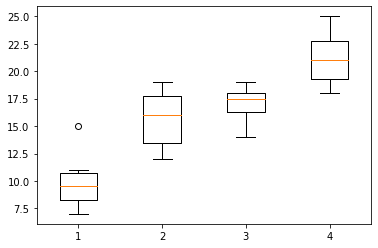

In [8]:
hc_5=[7,8,15,11,9,10]
hc_10=[12,17,13,18,19,15]
hc_15=[14,18,19,17,16,18]
hc_20=[19,25,22,23,18,20]

# hc=hardwood Concentartion
data=[hc_5,hc_10,hc_15,hc_20]
plt.boxplot(data)
plt.show()



In [9]:
data=pd.DataFrame(list(zip(hc_5,hc_10,hc_15,hc_20)),columns=['hc_5','hc_10','hc_15','hc_20'])
data

,hc_5,hc_10,hc_15,hc_20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [10]:
data_neww=pd.melt(data.reset_index(),id_vars=['index'],value_vars=['hc_5','hc_10','hc_15','hc_20'])
data_neww.columns=['index','treatments','values']
data_neww

,index,treatments,values
0,0,hc_5,7
1,1,hc_5,8
2,2,hc_5,15
3,3,hc_5,11
4,4,hc_5,9
5,5,hc_5,10
6,0,hc_10,12
7,1,hc_10,17
8,2,hc_10,13
9,3,hc_10,18


In [11]:
np.mean(data['hc_5'])

10.0

In [12]:
model=ols('values~treatments',data=data_neww)
fittedmodel=model.fit()
anova_table=sm.stats.anova_lm(fittedmodel)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
treatments,3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


In [13]:
scipy.stats.f.ppf(1-.01,3,20)

4.938193382310539

Since the calulated value 19.60 is greater than 4.93 at level of asignificance   .01 so we will reject the null hypothesis and reach to the conclusion that hardwood concentration significantly affects the pulp.


In [14]:
# NOW CALCULATING FISHER's LSD to find which two rows are different
t=-1*scipy.stats.t.ppf(.025,20)
t


2.085963447265837

In [15]:
n=6
MSE=6.50883
lsd=t*math.sqrt((2*MSE)/n)
lsd

3.0725398967723767

In [16]:
def mean_com(df,colone,coltwo):
  if np.mean(df[colone])<np.mean(df[coltwo]):
                                    colone,coltwo=coltwo,colone
  mean_diff=np.mean(df[colone])-np.mean(df[coltwo])
  if mean_diff>lsd:
    print("Found signficant difference")
  else: 
     print("not significant difference")


In [17]:
n=6
MSE=6.50883
lsd=t*math.sqrt((2*MSE)/n)
lsd

3.0725398967723767

In [18]:
mean_com(data,'hc_5','hc_10')
mean_com(data,'hc_5','hc_15')
mean_com(data,'hc_5','hc_20')
mean_com(data,'hc_10','hc_15')
mean_com(data,'hc_10','hc_20')
mean_com(data,'hc_15','hc_20')


Found signficant difference
Found signficant difference
Found signficant difference
not significant difference
Found signficant difference
Found signficant difference


From above we found that only hardwood concentration 10 and 15 and not significant difference and rest other are significantly differs. From the above boxplot we also observe that these value do not differs much 

Now applyng Tukey's Cramers test

In [19]:
mc=MultiComparison(data_neww['values'],data_neww['treatments'])
mcresult=mc.tukeyhsd(.05)
mcresult.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
hc_10,hc_15,1.3333,0.7827,-2.7894,5.4561,False
hc_10,hc_20,5.5,0.0066,1.3773,9.6227,True
hc_10,hc_5,-5.6667,0.0051,-9.7894,-1.5439,True
hc_15,hc_20,4.1667,0.047,0.0439,8.2894,True
hc_15,hc_5,-7.0,0.001,-11.1227,-2.8773,True
hc_20,hc_5,-11.1667,0.001,-15.2894,-7.0439,True


from tukey's test we get that hc_10 and hc_15 not significantly differs.
